In [2]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/AI_Files/PRAICP-1002-TrafSignDetc.zip"
extract_path = "/content/drive/MyDrive/AI_Files/extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted Files:", os.listdir(extract_path))

Extracted Files: ['Meta.csv', 'Meta', 'Test.csv', 'Test', 'Train.csv', 'Train', 'meta', 'test', 'train']


Total Classes: 6
Meta: 45 images
Test: 12631 images
Train: 43 images
meta: 45 images
test: 12631 images
train: 43 images


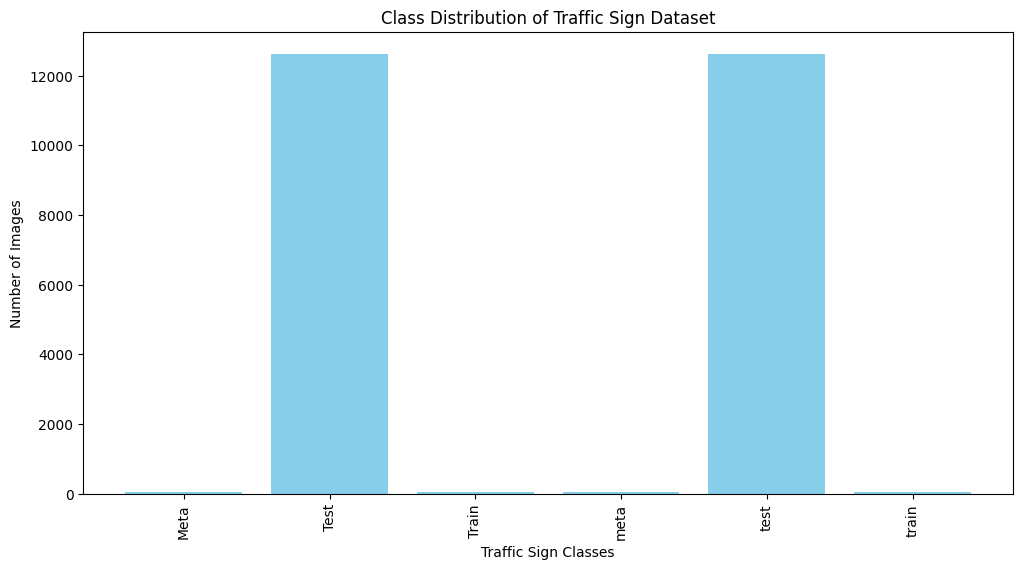

Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/train/0
Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/train/1
Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/train/10
Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/meta/.~lock.ClassesInformation.ods#
Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/meta/.~lock.ClassesInformationStrong.ods#
Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/Meta/.~lock.ClassesInformation.ods#
Error: Could not load image at /content/drive/MyDrive/AI_Files/extracted_data/Meta/.~lock.ClassesInformationStrong.ods#


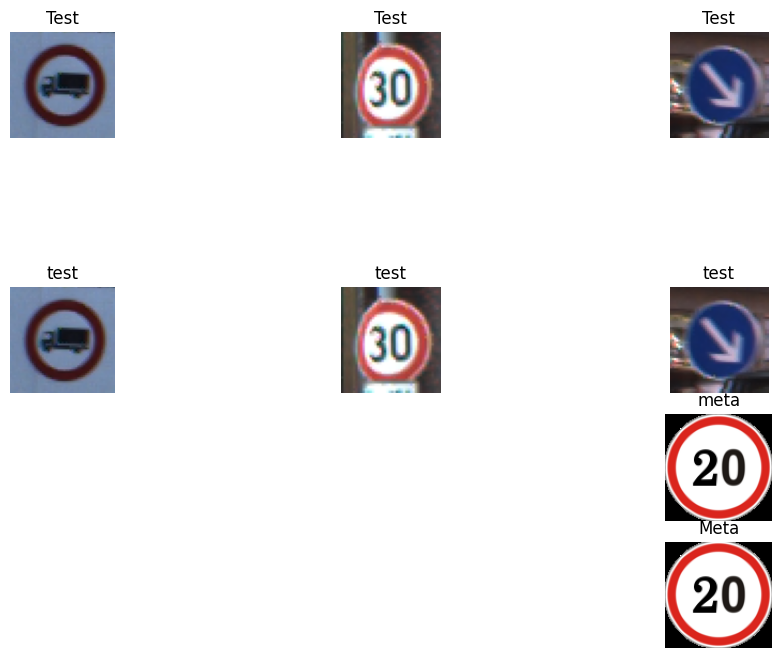

In [6]:
import os
import matplotlib.pyplot as plt
import cv2
import random

# Path to dataset (Modify this)
dataset_path = "/content/drive/MyDrive/AI_Files/extracted_data"

# Get class names (folder names)
class_names = sorted([cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))])
num_classes = len(class_names)

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in class_names}

# Display class distribution
print(f"Total Classes: {num_classes}")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Traffic Sign Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution of Traffic Sign Dataset")
plt.show()

# Function to visualize sample images
def show_samples(dataset_path, class_names, samples_per_class=3):
    plt.figure(figsize=(12, 8))
    for i, cls in enumerate(random.sample(class_names, min(5, num_classes))):  # Select 5 random classes
        img_paths = os.listdir(os.path.join(dataset_path, cls))
        for j in range(samples_per_class):
            img_path = os.path.join(dataset_path, cls, img_paths[j])
            img = cv2.imread(img_path)

            # Check if image was loaded successfully
            if img is None:
                print(f"Error: Could not load image at {img_path}")
                continue  # Skip to the next image

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(5, samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls)
    plt.show()

# Show sample images
show_samples(dataset_path, class_names)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2  # 20% data for validation
)

# Load images using ImageDataGenerator
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 83014 images belonging to 6 classes.
Found 20750 images belonging to 6 classes.
